In [1]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score,f1_score,recall_score,classification_report,accuracy_score
import joblib
from imblearn.over_sampling import SMOTE
from tqdm import tqdm


In [8]:
data_tr1=pd.read_csv("new_train_sample.csv")

In [9]:
data_tr1

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,...,NaN,NaN,5,66.0,NaN,Suspicious,Malicious,242.0,1445.0,10630.0
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,...,NaN,NaN,5,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,...,NaN,Destination,5,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0
3,3288552,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,NaN,...,NaN,NaN,5,66.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0
4,4060961,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,NaN,...,NaN,NaN,5,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498921,4347026,1443109013265,0,303,73123,2024-06-05T08:39:08.000Z,0,0,InitialAccess,T1078;T1078.004,...,NaN,NaN,5,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0
498922,1513648,730144442143,0,227,508755,2024-06-10T01:04:47.000Z,0,0,InitialAccess,T1078;T1078.004,...,NaN,NaN,5,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0
498923,782224,1340029798089,172,7161,9587,2024-06-04T17:46:25.000Z,10,8,InitialAccess,T1566.001,...,NaN,NaN,5,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0
498924,7601948,704374638309,0,94,502959,2024-06-08T09:39:29.000Z,0,0,InitialAccess,T1078;T1078.004,...,NaN,NaN,5,66.0,NaN,NaN,NaN,1.0,0.0,0.0


In [10]:
list(data_tr1.columns)  # full column view ("/content/new_train_sample.csv")

['Unnamed: 0',
 'Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'Timestamp',
 'DetectorId',
 'AlertTitle',
 'Category',
 'MitreTechniques',
 'IncidentGrade',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'EmailClusterId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'ThreatFamily',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'ResourceType',
 'Roles',
 'OSFamily',
 'OSVersion',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict',
 'CountryCode',
 'State',
 'City']

In [11]:
pd.set_option('display.max_columns', None)
data_tr1.head(1)

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,BenignPositive,NaN,NaN,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,Casdet,4132,4227,3586,NaN,NaN,5,66.0,NaN,Suspicious,Malicious,242.0,1445.0,10630.0


In [12]:
data_tr1.shape

(498926, 46)

In [13]:
data_tr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498926 entries, 0 to 498925
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          498926 non-null  int64  
 1   Id                  498926 non-null  int64  
 2   OrgId               498926 non-null  int64  
 3   IncidentId          498926 non-null  int64  
 4   AlertId             498926 non-null  int64  
 5   Timestamp           498926 non-null  object 
 6   DetectorId          498926 non-null  int64  
 7   AlertTitle          498926 non-null  int64  
 8   Category            498926 non-null  object 
 9   MitreTechniques     212040 non-null  object 
 10  IncidentGrade       496243 non-null  object 
 11  ActionGrouped       2944 non-null    object 
 12  ActionGranular      2944 non-null    object 
 13  EntityType          498926 non-null  object 
 14  EvidenceRole        498926 non-null  object 
 15  DeviceId            498926 non-nul

In [14]:
# Handling data

In [15]:
(data_tr1.isnull().sum()/(len(data_tr1)))*100

,0
Unnamed: 0,0.000000
Id,0.000000
OrgId,0.000000
IncidentId,0.000000
AlertId,0.000000
Timestamp,0.000000
DetectorId,0.000000
AlertTitle,0.000000
Category,0.000000
MitreTechniques,57.500712


In [16]:
threshold= len(data_tr1)* 0.5   # removing 50% above null value
data_tr1=data_tr1.dropna(thresh=threshold,axis=1)

In [17]:
data_tr1.shape

(498926, 36)

In [18]:
data_tr1.duplicated().sum()

0

In [19]:
data_tr1.drop_duplicates(inplace=True)

<ipython-input-19-7376794d8279>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1.drop_duplicates(inplace=True)


In [20]:
data_tr1.isnull().sum()

,0
Unnamed: 0,0
Id,0
OrgId,0
IncidentId,0
AlertId,0
Timestamp,0
DetectorId,0
AlertTitle,0
Category,0
IncidentGrade,2683


In [21]:
data_tr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498926 entries, 0 to 498925
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          498926 non-null  int64  
 1   Id                  498926 non-null  int64  
 2   OrgId               498926 non-null  int64  
 3   IncidentId          498926 non-null  int64  
 4   AlertId             498926 non-null  int64  
 5   Timestamp           498926 non-null  object 
 6   DetectorId          498926 non-null  int64  
 7   AlertTitle          498926 non-null  int64  
 8   Category            498926 non-null  object 
 9   IncidentGrade       496243 non-null  object 
 10  EntityType          498926 non-null  object 
 11  EvidenceRole        498926 non-null  object 
 12  DeviceId            498926 non-null  int64  
 13  Sha256              498926 non-null  int64  
 14  IpAddress           498926 non-null  int64  
 15  Url                 498926 non-nul

In [22]:
data_tr1["IncidentGrade"].fillna(data_tr1["IncidentGrade"].mode()[0],inplace=True) # fill mode values for IncidentGrade

<ipython-input-22-1843a2b56e5a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_tr1["IncidentGrade"].fillna(data_tr1["IncidentGrade"].mode()[0],inplace=True) # fill mode values for IncidentGrade
<ipython-input-22-1843a2b56e5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1["IncidentGrade"].fillna(data_tr1["IncidentGrade"].mode

In [23]:
data_tr1.IncidentGrade.unique()

array(['BenignPositive', 'TruePositive', 'FalsePositive'], dtype=object)

In [24]:
data_tr1['Timestamp']=pd.to_datetime(data_tr1['Timestamp']) # data clean Timestamp

<ipython-input-24-74a0ba3c43fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1['Timestamp']=pd.to_datetime(data_tr1['Timestamp']) # data clean Timestamp


In [25]:
data_tr1['Timestamp'].head()

,Timestamp
0,2024-06-06 05:56:47+00:00
1,2024-06-03 10:45:09+00:00
2,2024-06-13 03:36:40+00:00
3,2024-06-08 16:54:57+00:00
4,2024-06-09 02:48:01+00:00


In [26]:
data_tr1["Day"]=data_tr1["Timestamp"].dt.day
data_tr1["Month"]=data_tr1["Timestamp"].dt.month
data_tr1["Year"]=data_tr1["Timestamp"].dt.year
data_tr1["Hour"]=data_tr1["Timestamp"].dt.hour
data_tr1["Time"]=data_tr1["Timestamp"].dt.time

<ipython-input-26-50614ca389ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1["Day"]=data_tr1["Timestamp"].dt.day
<ipython-input-26-50614ca389ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1["Month"]=data_tr1["Timestamp"].dt.month
<ipython-input-26-50614ca389ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [27]:
data_tr1.drop("Timestamp",axis=1,inplace=True)   # doprring timestamp column
print(data_tr1.head())

   Unnamed: 0             Id  OrgId  IncidentId  AlertId  DetectorId  \
0     5172780  1709396985476     26       18583   687462          31   
1     8470561   927712939180     33        5065     3990          38   
2     5897583  1090921697002    201      150787   807590         419   
3     3288552  1434519079555    204      108287    28575          44   
4     4060961  1005022347708     54      528202  1458226         102   

   AlertTitle            Category   IncidentGrade EntityType EvidenceRole  \
0         813             Malware  BenignPositive       File      Related   
1          25              Impact  BenignPositive    Machine     Impacted   
2         444           Execution  BenignPositive    Machine     Impacted   
3        1233  SuspiciousActivity    TruePositive       File      Related   
4       58829        Exfiltration  BenignPositive       File     Impacted   

   DeviceId  Sha256  IpAddress     Url  AccountSid  AccountUpn  \
0     98799    1296     360606  160396

<ipython-input-27-564c5023b487>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1.drop("Timestamp",axis=1,inplace=True)   # doprring timestamp column


In [28]:
data_tr1['IncidentGrade'].value_counts()

,count
IncidentGrade,
BenignPositive,217671
TruePositive,174451
FalsePositive,106804


In [29]:
data_tr1.Category.unique()

array(['Malware', 'Impact', 'Execution', 'SuspiciousActivity',
       'Exfiltration', 'InitialAccess', 'DefenseEvasion',
       'CommandAndControl', 'Discovery', 'Persistence',
       'CredentialAccess', 'LateralMovement', 'Ransomware',
       'UnwantedSoftware', 'PrivilegeEscalation', 'Exploit', 'Collection',
       'CredentialStealing'], dtype=object)

In [30]:
  data_tr1.isnull().sum()

,0
Unnamed: 0,0
Id,0
OrgId,0
IncidentId,0
AlertId,0
DetectorId,0
AlertTitle,0
Category,0
IncidentGrade,0
EntityType,0


In [31]:
# Data Visualization

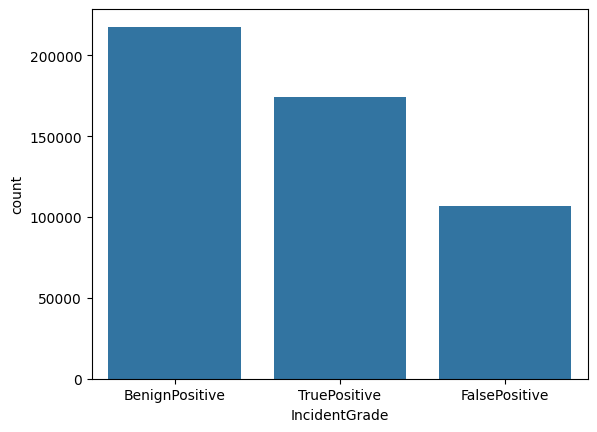

In [32]:
# Distribution of target variable
sns.countplot(x="IncidentGrade", data=data_tr1)
plt.show()

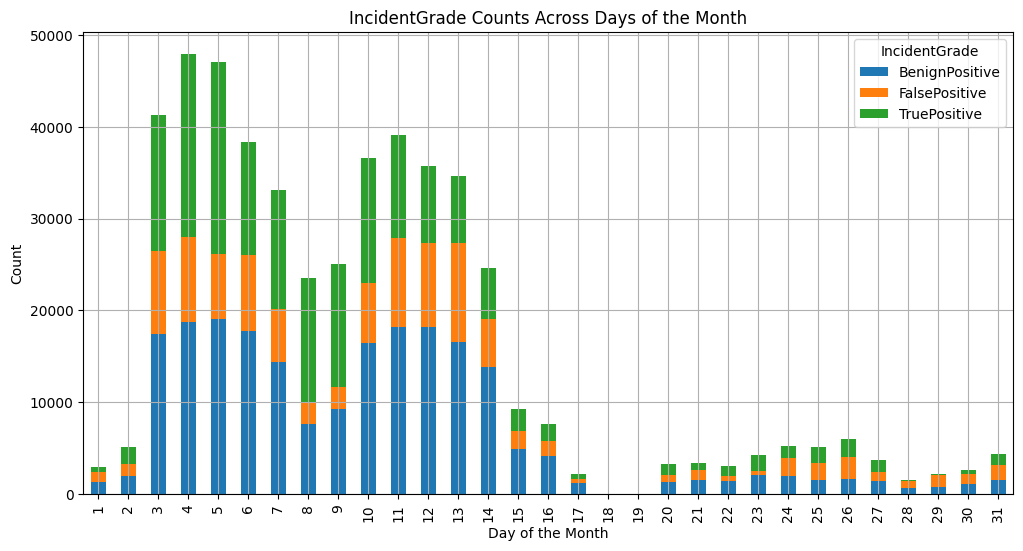

In [33]:
# Aggregate data
day_incident_grade = data_tr1.groupby(['Day', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

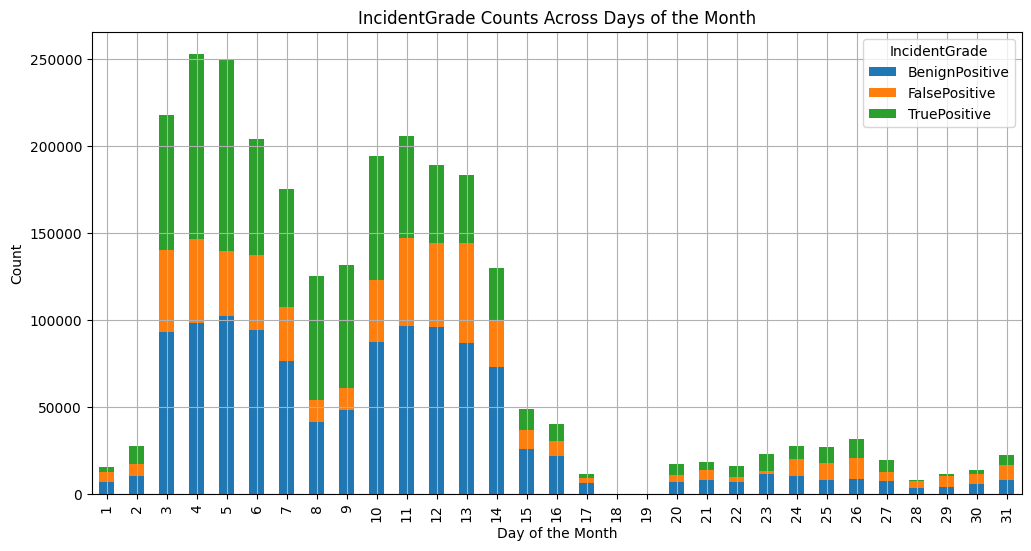

In [ ]:
# Aggregate data
day_incident_grade = data_tr1.groupby(['Day', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

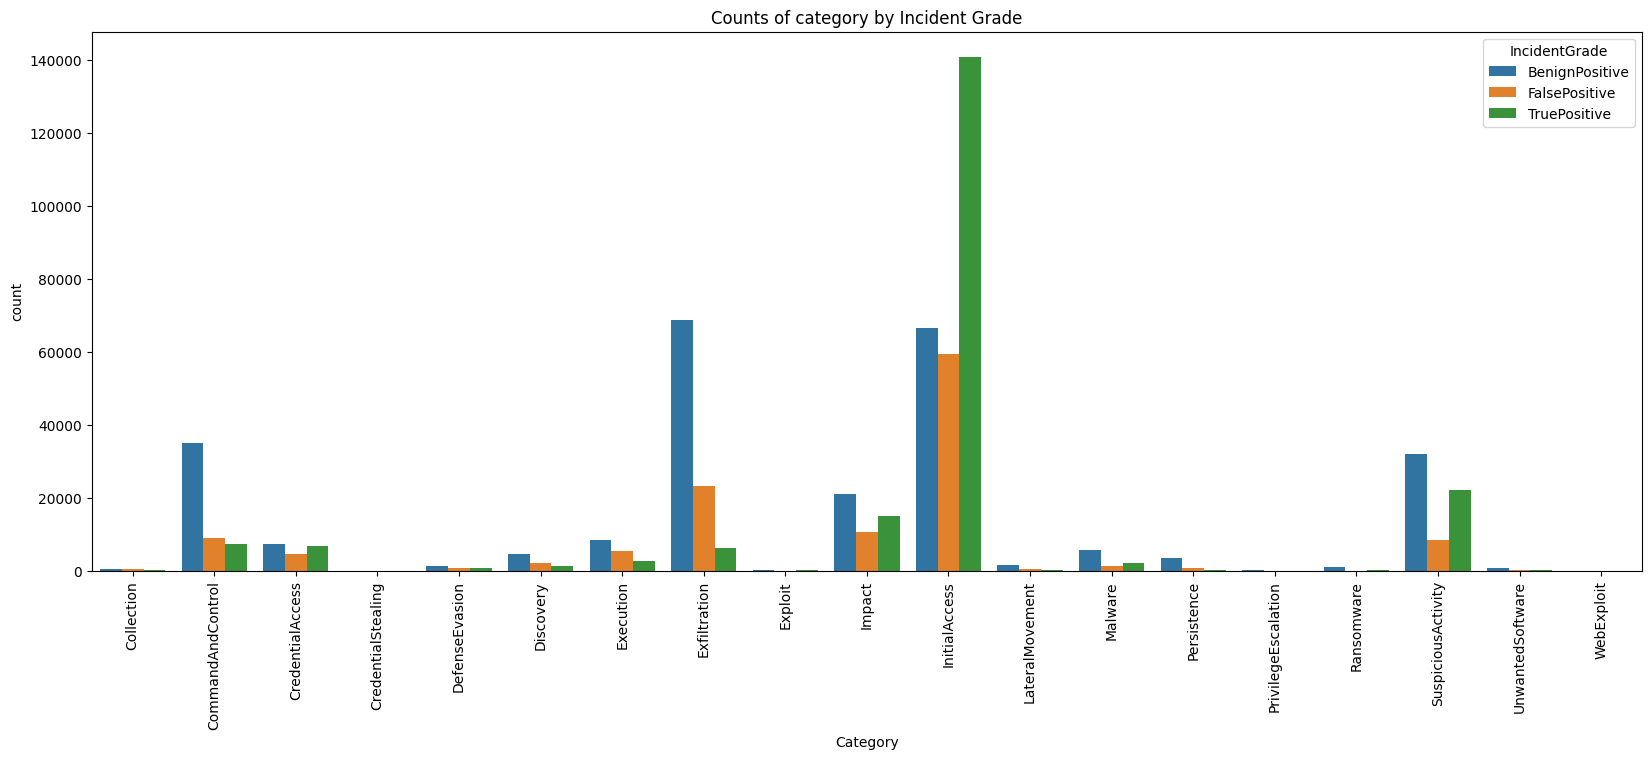

In [ ]:
# Aggregate data
grouped_data=data_tr1.groupby(["Category","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(20,7))
sns.barplot(data=grouped_data,x="Category", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of category by Incident Grade")
plt.show()

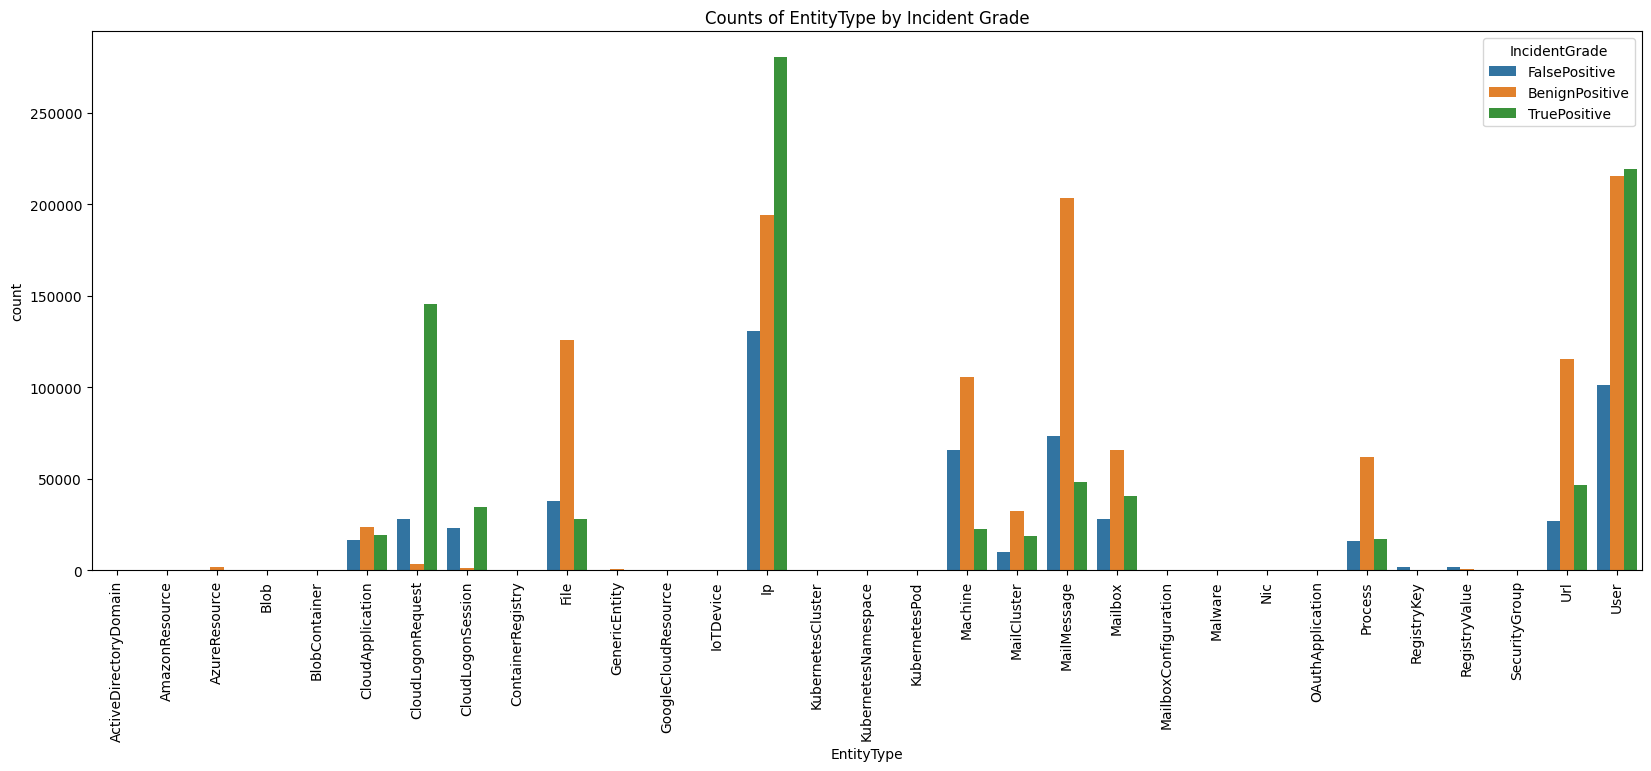

In [ ]:
# Aggregate data
grouped_data=data_tr1.groupby(["EntityType","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(20,7))
sns.barplot(data=grouped_data,x="EntityType", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of EntityType by Incident Grade")
plt.show()


In [34]:
# dropping 70% above correlated columns
data_tr1.drop(["Month","DeviceName","DeviceId","ResourceIdName","Unnamed: 0","OAuthApplicationId","NetworkMessageId"], axis =1 , inplace = True)

<ipython-input-34-9cd3b8fc7adf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1.drop(["Month","DeviceName","DeviceId","ResourceIdName","Unnamed: 0","OAuthApplicationId","NetworkMessageId"], axis =1 , inplace = True)


In [35]:

data_tr1['State'].fillna(data_tr1['State'].mode()[0], inplace=True)
data_tr1['CountryCode'].fillna(data_tr1['CountryCode'].mode()[0], inplace=True)
data_tr1['City'].fillna(data_tr1['City'].mode()[0], inplace=True)

<ipython-input-35-72ea5576f60c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_tr1['State'].fillna(data_tr1['State'].mode()[0], inplace=True)
<ipython-input-35-72ea5576f60c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1['State'].fillna(data_tr1['State'].mode()[0], inplace=True)
<ipython-input-35-72ea5576f60c>:2: FutureWarnin

In [36]:
data_tr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498926 entries, 0 to 498925
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 498926 non-null  int64  
 1   OrgId              498926 non-null  int64  
 2   IncidentId         498926 non-null  int64  
 3   AlertId            498926 non-null  int64  
 4   DetectorId         498926 non-null  int64  
 5   AlertTitle         498926 non-null  int64  
 6   Category           498926 non-null  object 
 7   IncidentGrade      498926 non-null  object 
 8   EntityType         498926 non-null  object 
 9   EvidenceRole       498926 non-null  object 
 10  Sha256             498926 non-null  int64  
 11  IpAddress          498926 non-null  int64  
 12  Url                498926 non-null  int64  
 13  AccountSid         498926 non-null  int64  
 14  AccountUpn         498926 non-null  int64  
 15  AccountObjectId    498926 non-null  int64  
 16  Ac

In [ ]:
# Feature selection and correlation¶

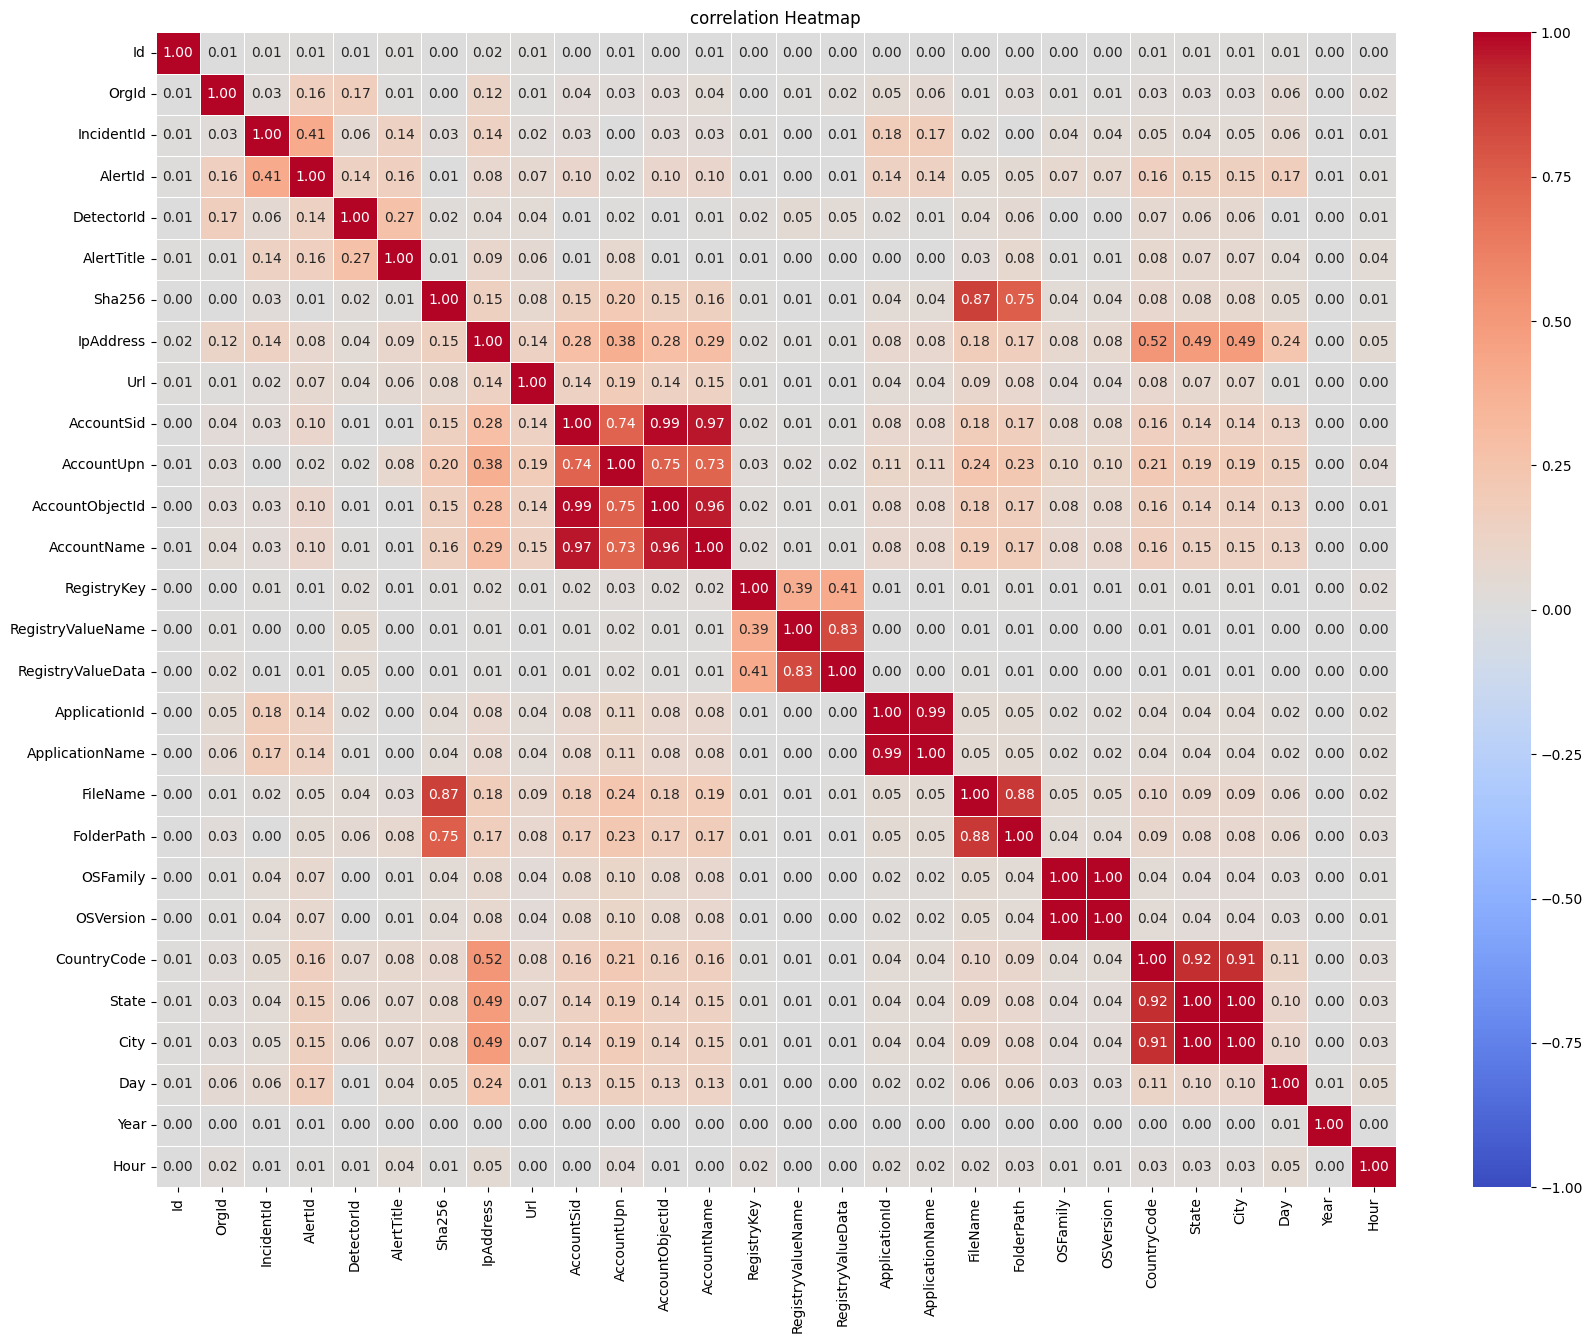

In [37]:
# selecting numerical col
numeric_df=data_tr1.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [38]:
# dropping 70% above correlated columns
data_tr1.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","AccountObjectId","FolderPath","AccountUpn"], axis =1 , inplace = True)

<ipython-input-38-d9a6cc5908e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","AccountObjectId","FolderPath","AccountUpn"], axis =1 , inplace = True)


In [39]:
# dropping 70% above correlated columns
data_tr1.drop(["RegistryKey","RegistryValueData","DetectorId","Id" ], axis =1 , inplace = True)

<ipython-input-39-92a70133bd5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1.drop(["RegistryKey","RegistryValueData","DetectorId","Id" ], axis =1 , inplace = True)


In [40]:
# dropping 70% above correlated columns
data_tr1.drop(["OSFamily","OSVersion",'State','FileName','AccountName' ], axis =1 , inplace = True)

<ipython-input-40-5b4e9b6db793>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1.drop(["OSFamily","OSVersion",'State','FileName','AccountName' ], axis =1 , inplace = True)


In [41]:
data_tr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498926 entries, 0 to 498925
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OrgId          498926 non-null  int64  
 1   IncidentId     498926 non-null  int64  
 2   AlertId        498926 non-null  int64  
 3   AlertTitle     498926 non-null  int64  
 4   Category       498926 non-null  object 
 5   IncidentGrade  498926 non-null  object 
 6   EntityType     498926 non-null  object 
 7   EvidenceRole   498926 non-null  object 
 8   IpAddress      498926 non-null  int64  
 9   Url            498926 non-null  int64  
 10  ApplicationId  498926 non-null  int64  
 11  City           498926 non-null  float64
 12  Day            498926 non-null  int32  
 13  Year           498926 non-null  int32  
 14  Hour           498926 non-null  int32  
 15  Time           498926 non-null  object 
dtypes: float64(1), int32(3), int64(7), object(5)
memory usage: 55.2+ MB


In [42]:
#Encoding

In [43]:
data_tr1.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time'], dtype='object')

In [44]:
Categorical_coltr=['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time']

In [45]:
# Label encoder

In [46]:
encoders = {}
for i in Categorical_coltr:
    le = LabelEncoder()
    data_tr1[i]=le.fit_transform(data_tr1[i])
    encoders[i]=le

<ipython-input-46-6ec202308706>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1[i]=le.fit_transform(data_tr1[i])
<ipython-input-46-6ec202308706>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1[i]=le.fit_transform(data_tr1[i])
<ipython-input-46-6ec202308706>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [47]:
data_tr1

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Year,Hour,Time
0,26,18583,687462,813,12,0,7,1,360606,160396,2251,10630.0,6,2024,5,20548
1,33,5065,3990,25,9,0,12,0,360606,160396,2251,10630.0,3,2024,10,37160
2,201,150787,807590,444,6,0,12,0,360606,160396,2251,10630.0,13,2024,3,12520
3,204,108287,28575,1233,16,2,7,1,360606,160396,2251,10630.0,8,2024,16,59026
4,54,528202,1458226,58829,7,0,7,0,360606,160396,2251,10630.0,9,2024,2,9717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498921,0,303,73123,0,10,2,5,1,360606,160396,2251,10630.0,5,2024,8,29849
498922,0,227,508755,0,10,2,25,0,360606,160396,2251,10630.0,10,2024,1,3762
498923,172,7161,9587,8,10,2,7,1,360606,160396,2251,10630.0,4,2024,17,62080
498924,0,94,502959,0,10,2,10,1,43,160396,2251,0.0,8,2024,9,33340


In [48]:
data_tr1.select_dtypes(include=["int32", "int64","float64"]).columns

Index(['OrgId', 'IncidentId', 'AlertId', 'AlertTitle', 'Category',
       'IncidentGrade', 'EntityType', 'EvidenceRole', 'IpAddress', 'Url',
       'ApplicationId', 'City', 'Day', 'Year', 'Hour', 'Time'],
      dtype='object')

In [ ]:
data_tr1.to_csv('/content/datatrain_process.csv',index= False)

In [ ]:
# TRAIN TEST SPLIT

In [49]:
data_tr1.head()

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Year,Hour,Time
0,26,18583,687462,813,12,0,7,1,360606,160396,2251,10630.0,6,2024,5,20548
1,33,5065,3990,25,9,0,12,0,360606,160396,2251,10630.0,3,2024,10,37160
2,201,150787,807590,444,6,0,12,0,360606,160396,2251,10630.0,13,2024,3,12520
3,204,108287,28575,1233,16,2,7,1,360606,160396,2251,10630.0,8,2024,16,59026
4,54,528202,1458226,58829,7,0,7,0,360606,160396,2251,10630.0,9,2024,2,9717


In [50]:
from imblearn.over_sampling import RandomOverSampler

In [51]:
os =RandomOverSampler(random_state = 94)

In [52]:
val =data_tr1.drop('IncidentGrade', axis =1)

In [53]:
tar = data_tr1['IncidentGrade']

In [54]:
tar.value_counts()

,count
IncidentGrade,
0,217671
2,174451
1,106804


In [55]:
oval,otar = os.fit_resample(val,tar)

In [56]:
otar.value_counts()  # Class distribution after RandomOverSampler:

,count
IncidentGrade,
0,217671
2,217671
1,217671


In [57]:
# Feature selection

In [58]:
fs = RandomForestClassifier(n_estimators = 800, random_state =79)

In [59]:
fs.fit(oval,otar)

RandomForestClassifier(n_estimators=800, random_state=79)

In [60]:
pd.DataFrame({
    "columns": oval.columns,
    "Score": fs.feature_importances_
}).sort_values('Score', ascending =False).head(15)["columns"].to_list()

['OrgId',
 'IncidentId',
 'AlertId',
 'AlertTitle',
 'Day',
 'Category',
 'Time',
 'EntityType',
 'Hour',
 'IpAddress',
 'City',
 'Url',
 'EvidenceRole',
 'ApplicationId',
 'Year']

In [63]:
oval = oval[['OrgId',
 'IncidentId',
 'AlertId',
 'AlertTitle',
 'Day',
 'Category',
 'Time',
 'EntityType',
 'Hour',
 'IpAddress',
 'City',
 'Url',
 'EvidenceRole',
 'ApplicationId',
 'Year']]

In [64]:
# Train Test Split
traindata,testdata, trainlab,testlab = train_test_split(oval,otar, test_size = 0.20, random_state = 43)

In [65]:
traindata.shape

(522410, 15)

In [66]:
testdata.shape

(130603, 15)

In [ ]:
# Model building

In [67]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import xgboost

In [68]:
dt_model= DecisionTreeClassifier(max_depth=8,random_state=100,min_samples_split=10,min_samples_leaf=5,max_features="sqrt")

In [69]:
dt_model.fit(traindata,trainlab)

DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, random_state=100)

In [70]:
def metrics(actual, predicted):
    acc = accuracy_score(actual, predicted) * 100
    prec = precision_score(actual, predicted, average="macro") * 100
    recall = recall_score(actual, predicted, average="macro") * 100
    macro_f1 = f1_score(actual, predicted, average="macro") * 100

    return pd.DataFrame({
        "Metrics": ["Accuracy", "Precision", "Recall", "Macro F1"],
        "Values": [acc, prec, recall, macro_f1]
    }).set_index("Metrics")

In [71]:
dttr_pred =dt_model.predict(traindata)
dtts_pred =dt_model.predict(testdata)

In [72]:
dttrain_metrics=metrics(trainlab,dttr_pred)

In [73]:

dttest_metrics=metrics(testlab,dtts_pred)

In [74]:
pd.DataFrame({
    "Training":dttrain_metrics["Values"],
    "Testing":dttest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,66.938420,66.537522
1,Precision,70.167477,69.820392
2,Recall,66.936621,66.544449
3,Macro F1,67.458296,67.070455


In [75]:
# RANDOM FOREST
rfc =RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=200,n_jobs=-1,random_state=100)

In [76]:

rfc.fit(traindata,trainlab)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=100)

In [77]:
rftr_pred =rfc.predict(traindata)
rfts_pred =rfc.predict(testdata)

In [78]:
rftrain_metrics=metrics(trainlab,rftr_pred)
rftest_metrics=metrics(testlab,rfts_pred)

In [79]:
pd.DataFrame({
    "Training":rftrain_metrics["Values"],
    "Testing":rftest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,76.985892,76.559497
1,Precision,82.888749,82.543064
2,Recall,76.978938,76.587775
3,Macro F1,77.414354,77.000362


In [80]:
# XGBoost

In [81]:
# XGBoost
xgbmodel = xgboost.XGBClassifier(n_estimators=200,learning_rate=0.1,random_state=100,n_jobs=-1,max_depth=8)

In [82]:
xgbmodel.fit(traindata,trainlab)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [83]:
xgbtr_pred =xgbmodel.predict(traindata)
xgbts_pred =xgbmodel.predict(testdata)

In [84]:
xgbtrain_metrics = metrics(trainlab,xgbtr_pred)
xgbtest_metrics =metrics(testlab,xgbts_pred)

In [85]:
pd.DataFrame({
    "Training":xgbtrain_metrics["Values"],
    "Testing":xgbtest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,93.199403,92.573677
1,Precision,93.245099,92.624301
2,Recall,93.199993,92.571213
3,Macro F1,93.204904,92.579388
